## Spectrum Correlograms

First we will import the raw data

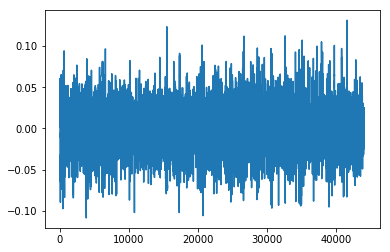

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

helicopters = []
boats = []

sampling_rate = 44100 # All clips will be converted to this rate
duration = 1 # How much of clip to use (seconds)

data_filepath = "../Meeting-3/"

# Import raw data
for i in range(10):
    raw_data = librosa.load(data_filepath + "heli" + str(i) + "_short.wav", sr=sampling_rate, mono=False, duration=duration)
    
    # Only use one channel
    if raw_data[0].shape[0] == 2:
        raw_data = (raw_data[0][0], raw_data[1])
    helicopters.append(raw_data)
    
    raw_data = librosa.load(data_filepath + "boat" + str(i) + "_short.wav", sr=sampling_rate, mono=False, duration=duration)
    # Only use one channel
    if raw_data[0].shape[0] == 2:
        raw_data = (raw_data[0][0], raw_data[1])
    boats.append(raw_data)

plt.plot(helicopters[0][0])
plt.show()

Now we can generate features for each class of sound

In [5]:
# Parameters
acf_window = 40
count_obs = 87 # Need to figure out how to calculate this
count_bins = 128 # Default for librosa, may want to change

# Features is an N x F matrix
# N: number of observations
# F: total feature size
#features = np.zeros((count_obs, count_mels*acf_window))
features = []

### Helicopters

0


/home/andy/anaconda3/envs/mlsp/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


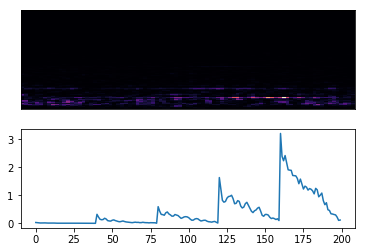

1


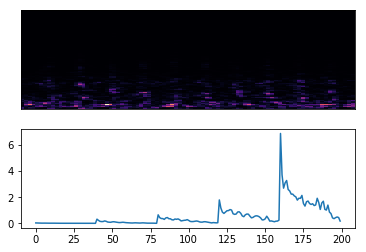

2


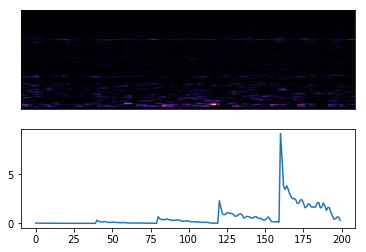

3


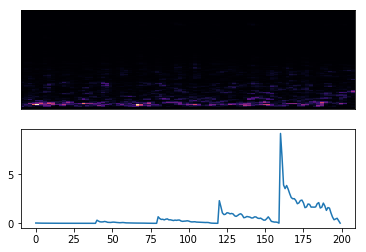

4


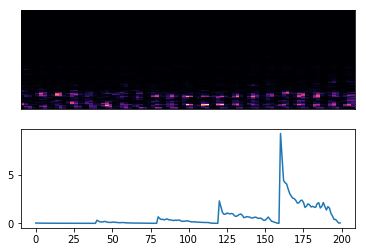

5


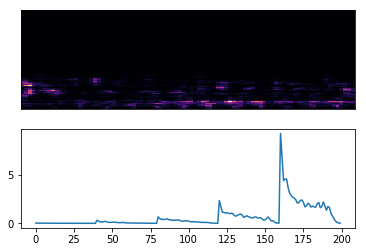

6


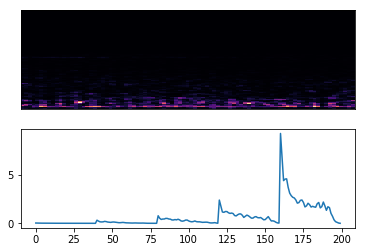

7


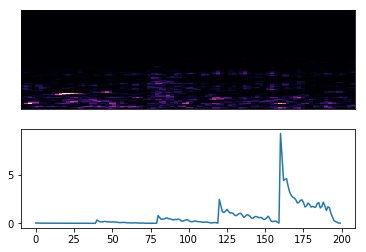

8


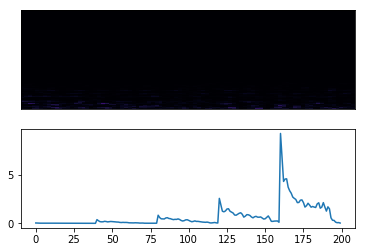

9


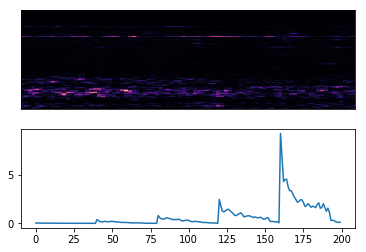

957


In [7]:
for i in range(len(helicopters)):
    data = helicopters[i]
    
    # Generate mel spectrograms
    spec = librosa.feature.melspectrogram(data[0], sr=sampling_rate)
    
    # Generate chromagram
    #spec = librosa.feature.chroma_stft(data[0], sr=sampling_rate)
    
    # For each bin, calculate autocorrelation
    for j in range(count_obs):
        obs = []
        for k in range(count_bins):
            obs.extend(librosa.core.autocorrelate(spec[k, j:j+acf_window]))
        
        features.append(obs)
    
    # Plot spectrogram
    print(i)
    plt.subplot(2, 1, 1)
    librosa.display.specshow(spec)
    plt.subplot(2, 1, 2)
    plt.plot(features[i][:acf_window*5])
    plt.show()

print(len(features))

### Boats

0


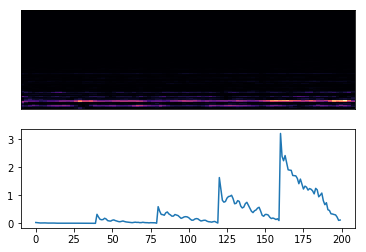

1


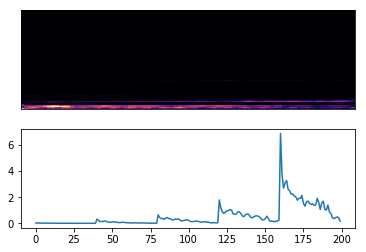

2


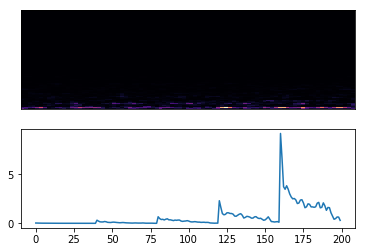

3


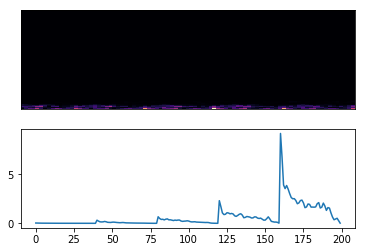

4


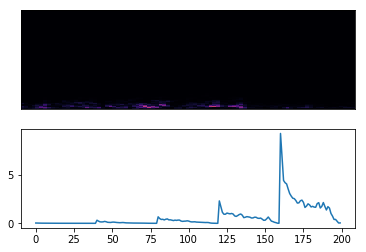

5


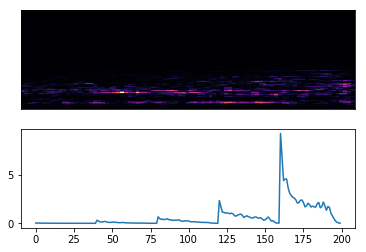

6


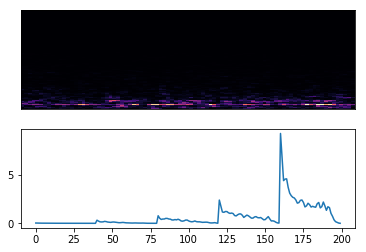

7


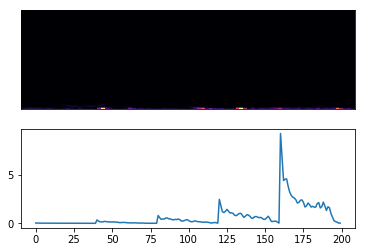

8


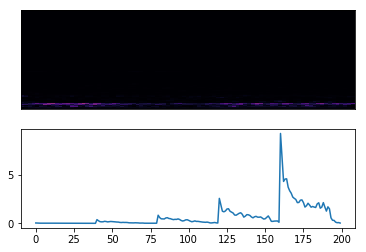

9


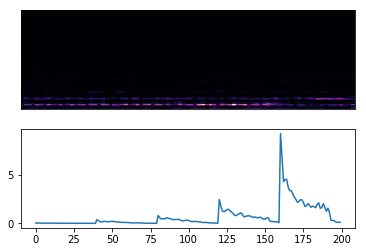

1827


In [8]:
for i in range(len(boats)):
    data = boats[i]
    
    # Generate mel spectrograms
    spec = librosa.feature.melspectrogram(data[0], sr=sampling_rate)
    
    # Generate chromagram
    #spec = librosa.feature.chroma_stft(data[0], sr=sampling_rate)
    
    # For each bin, calculate autocorrelation
    for j in range(count_obs):
        obs = []
        for k in range(count_bins):
            obs.extend(librosa.core.autocorrelate(spec[k, j:j+acf_window]))
        
        features.append(obs)
    
    # Plot spectrogram
    print(i)
    plt.subplot(2, 1, 1)
    librosa.display.specshow(spec)
    plt.subplot(2, 1, 2)
    plt.plot(features[i][:acf_window*5])
    plt.show()

print(len(features))